<a href="https://colab.research.google.com/github/JoseManuel1007/Proyecto-4/blob/main/Proyecto_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


# Se selecciona una imagen para que el modelo la analice

In [15]:
from roboflow import Roboflow
from PIL import Image
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# --- 1. Abrir imagen original ---
img = Image.open(file_name)

# --- 2. Reescalar la imagen a 640x640 ---
img = img.resize((640, 640))

# --- 3. Guardar imagen reescalada ---
img.save("resized_imagen.jpg")

# --- 4. Cargar modelo de Roboflow ---
rf = Roboflow(api_key="WYcOA7iJoEobKqftcfU6")
project = rf.workspace("proyect").project("electric-arc-66sbj")
model = project.version(2).model

# --- 5. Predicción con threshold bajo (por si acaso) ---
prediction = model.predict(
    "resized_imagen.jpg",
    confidence=0.15
).json()

print(prediction)

Saving 500_kV_Switch.jpg to 500_kV_Switch.jpg
loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 288, 'y': 216, 'width': 226, 'height': 422, 'confidence': 0.5894027352333069, 'class': 'arc', 'class_id': 0, 'detection_id': '9f670cfb-aac6-4ebe-acf8-4176801e4764', 'image_path': 'resized_imagen.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}


In [17]:
import cv2

image_path = 'resized_imagen.jpg'
image = cv2.imread(image_path)

if image is not None:
    print(f"Successfully loaded image: {image_path}")
    print(f"Image shape: {image.shape}")
else:
    print(f"Error: Could not load image from {image_path}")

# Print the prediction variable to confirm its contents and structure
print("\nPrediction data:")
print(prediction)

Successfully loaded image: resized_imagen.jpg
Image shape: (640, 640, 3)

Prediction data:
{'predictions': [{'x': 288, 'y': 216, 'width': 226, 'height': 422, 'confidence': 0.5894027352333069, 'class': 'arc', 'class_id': 0, 'detection_id': '9f670cfb-aac6-4ebe-acf8-4176801e4764', 'image_path': 'resized_imagen.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}


# Dibuja el cuadro

In [18]:
for p in prediction['predictions']:
    x_center = p['x']
    y_center = p['y']
    width = p['width']
    height = p['height']
    obj_class = p['class']
    confidence = p['confidence']

    # Calculate top-left and bottom-right corners
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # Draw bounding box
    color = (0, 255, 0)  # Green color for the bounding box
    thickness = 2
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

    # Format label string
    label = f"{obj_class}: {confidence:.2f}"

    # Put label on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    text_color = (255, 255, 255) # White color for text

    # Get text size to position the label correctly (above the box)
    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
    text_x = x1
    text_y = y1 - 10 if y1 - 10 > text_height else y1 + text_height + 10 # Adjust position if too high

    cv2.putText(image, label, (text_x, text_y), font, font_scale, text_color, font_thickness, cv2.LINE_AA)

print("Bounding boxes and labels drawn on the image.")

Bounding boxes and labels drawn on the image.


# muestra la imagen con el cuadro


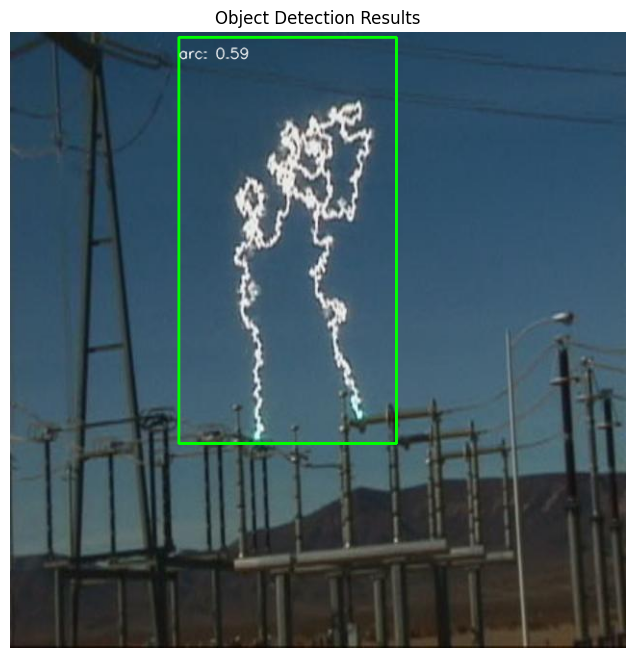

Annotated image displayed.


In [19]:
import matplotlib.pyplot as plt

# OpenCV reads images in BGR format, matplotlib expects RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title('Object Detection Results')
plt.axis('off') # Hide axes ticks and labels
plt.show()

print("Annotated image displayed.")